In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [3]:
df = pd.read_csv("../Python/Output/CotDiff.txt", sep='\t')
df.head()

,Order,Freq,X,Index Cot,Uncertainty,Value Error
0,4,1,0.196350,5.027339,8.912752e-16,0.000000e+00
1,4,2,0.392699,2.414214,4.367891e-16,0.000000e+00
2,4,3,0.589049,1.496606,2.663128e-16,0.000000e+00
3,4,4,0.785398,1.000000,2.026978e-16,-2.220446e-16
4,4,5,0.981748,0.668179,1.333328e-16,-1.110223e-16


In [4]:
df['Normalized Error'] = df['Value Error']/df['Uncertainty']
df['Absolute Error'] = np.abs(df['Value Error'])

# LibSin Errors Increase with FFT Order

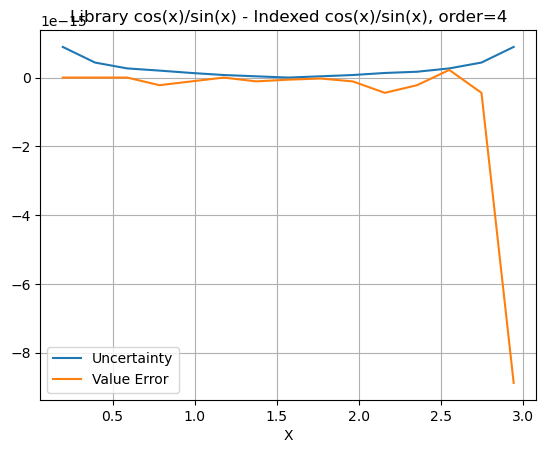

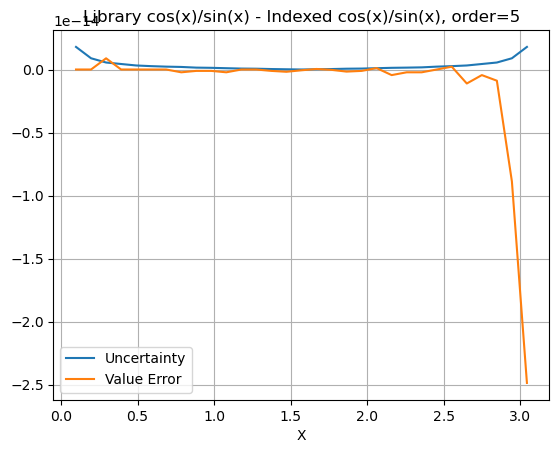

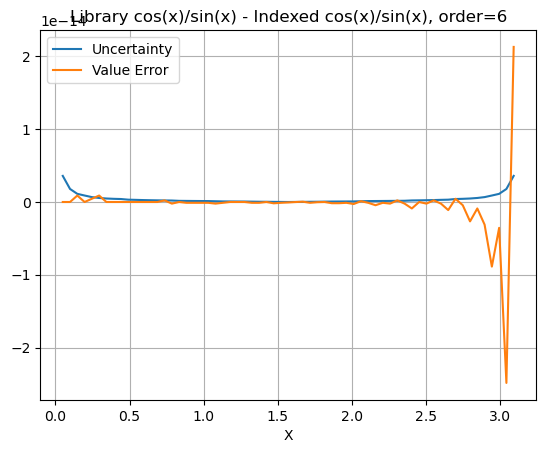

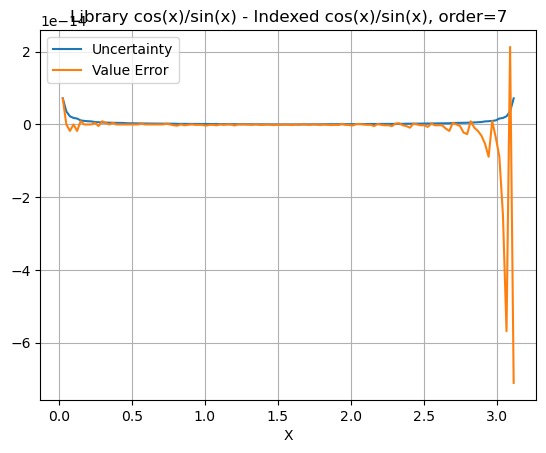

In [5]:
for order in range(4, 8):
    df[(df['Order']==order)].set_index('X')[['Uncertainty', 'Value Error']]\
        .plot(title=f'Library cos(x)/sin(x) - Indexed cos(x)/sin(x), order={order}', grid=True)

In [6]:
sCtanDev = {order: df[(df['Order']==order) & (df['X'] > math.pi/16*15)]['Value Error'].std() for order in range(4, 17)}
sCtanDev

{4: nan,
 5: nan,
 6: 2.3115401499210408e-14,
 7: 3.297443374843044e-14,
 8: 1.3872769622932148e-13,
 9: 1.5446934360782115e-12,
 10: 1.1225314117350113e-12,
 11: 1.073696381218577e-11,
 12: 2.2912201347850398e-11,
 13: 2.420510472253099e-11,
 14: 2.167865712430489e-10,
 15: 1.7718134254750616e-10,
 16: 4.148636408617792e-10}

In [7]:
sCtanNorm = {order: df[(df['Order']==order) & (df['X'] > math.pi/16*15)]['Normalized Error'].std() for order in range(4, 17)}
sCtanNorm

{4: nan,
 5: nan,
 6: 9.92149121500752,
 7: 10.313197739523254,
 8: 12.235948049790482,
 9: 55.186456987688025,
 10: 42.79139980486452,
 11: 99.27791364370611,
 12: 119.75014863878557,
 13: 101.38078654020579,
 14: 255.37290049806344,
 15: 206.76367055669948,
 16: 294.70208967308196}

In [8]:
sCtanAbs = {order: df[(df['Order']==order)]['Absolute Error'].std() for order in range(4, 17)}
sCtanAbs

{4: 2.2616360509362802e-15,
 5: 4.655361295161472e-15,
 6: 4.2069559768308065e-15,
 7: 8.535951866996034e-15,
 8: 9.506289680560948e-14,
 9: 1.0793969333028232e-12,
 10: 7.910955922384902e-13,
 11: 7.568476180729999e-12,
 12: 1.6179219265229083e-11,
 13: 1.7060747322653642e-11,
 14: 1.5321697831951515e-10,
 15: 1.2520455417983263e-10,
 16: 2.9333724576607996e-10}

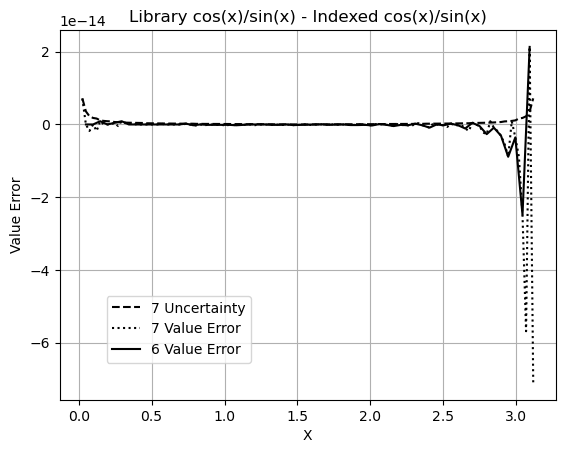

In [11]:
fig, ax = plt.subplots()
ax.set_title('Library cos(x)/sin(x) - Indexed cos(x)/sin(x)')
ax.set_xlabel('X')
ax.set_ylabel('Value Error')
plt.grid(True)
ax.plot(df[df['Order']==7]['X'], df[df['Order']==7]['Uncertainty'], 'k--', label=f'7 Uncertainty')
ax.plot(df[df['Order']==7]['X'], df[df['Order']==7]['Value Error'], 'k:', label=f'7 Value Error')
ax.plot(df[df['Order']==6]['X'], df[df['Order']==6]['Value Error'], 'k-', label=f'6 Value Error')
ax.legend(bbox_to_anchor=(0.4, 0.3))

# Compare Lib sin(x) and Lib 1/tan(x)

In [12]:
dfSin = pd.read_csv("../Python/Output/SinDiff_Stat.txt", sep='\t')
dfSin.head()

,Order,Part,Type,Count,Min,Max,Mean,Dev
0,4,Indexed,Value,1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,4,Indexed,Normalized,1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,4,Library,Value,128,-2.220446e-16,2.220446e-16,0.000000e+00,7.076311e-17
3,4,Library,Normalized,128,-1.511866e+00,1.611104e+00,-9.867947e-04,4.889364e-01
4,4,Library,Sin,128,-2.109424e-15,2.053913e-15,1.163328e-17,6.217527e-16


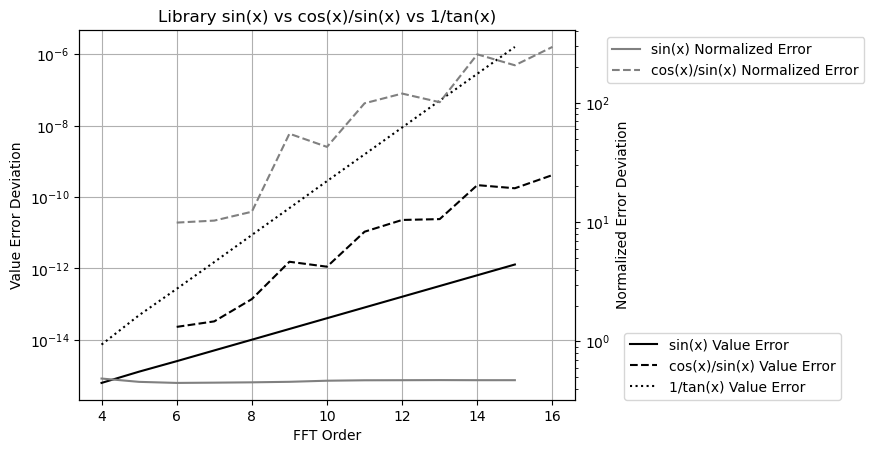

In [14]:
fig, ax = plt.subplots()
ax.set_title('Library sin(x) vs cos(x)/sin(x) vs 1/tan(x)')
ax.set_xlabel('FFT Order')
ax.set_ylabel('Value Error Deviation')
ax.set_yscale('log')
plt.grid(True)

dfPlot = dfSin[(dfSin['Part']=='Library') & (dfSin['Type']=='Sin')]
ax.plot(dfPlot['Order'], dfPlot['Dev'], 'k-', label='sin(x) Value Error')
ax.plot(sCtanDev.keys(), sCtanDev.values(), 'k--', label='cos(x)/sin(x) Value Error')
dfPlot = dfSin[(dfSin['Part']=='Library') & (dfSin['Type']=='Tan')]
ax.plot(dfPlot['Order'], dfPlot['Dev'], 'k:', label='1/tan(x) Value Error')

ax2 = ax.twinx()
ax2.set_ylabel('Normalized Error Deviation')
ax2.set_yscale('log')
dfPlot = dfSin[(dfSin['Part']=='Library') & (dfSin['Type']=='Normalized')]
ax2.plot(dfPlot['Order'], dfPlot['Dev'], c='gray', ls='-', label='sin(x) Normalized Error')
ax2.plot(sCtanNorm.keys(), sCtanNorm.values(), c='gray', ls='--', label='cos(x)/sin(x) Normalized Error')

ax.legend(bbox_to_anchor=(1.55, 0.2))
ax2.legend(bbox_to_anchor=(1.05, 1))

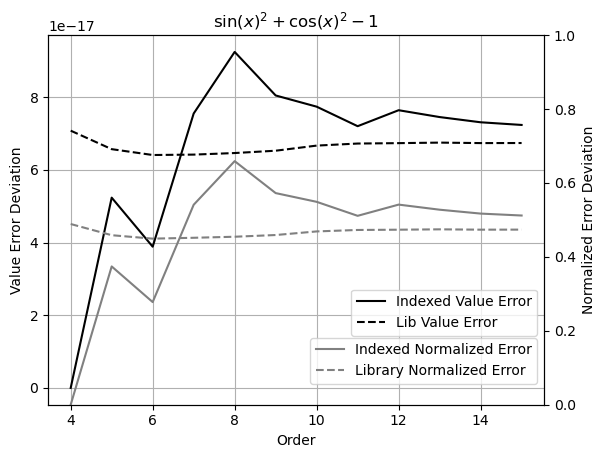

In [16]:
fig, ax = plt.subplots()
ax.set_title(r'$\sin(x)^2 + \cos(x)^2 - 1$')
ax.set_xlabel('Order')
plt.grid(True)

ax.set_ylabel('Value Error Deviation')
dfPlot = dfSin[(dfSin['Part']=='Indexed') & (dfSin['Type']=='Value')]
ax.plot(dfPlot['Order'], dfPlot['Dev'], 'k-', label='Indexed Value Error')
dfPlot = dfSin[(dfSin['Part']=='Library') & (dfSin['Type']=='Value')]
ax.plot(dfPlot['Order'], dfPlot['Dev'], 'k--', label='Lib Value Error')

ax2 = ax.twinx()
ax2.set_ylabel('Normalized Error Deviation')
ax2.set_ylim((0, 1))
dfPlot = dfSin[(dfSin['Part']=='Indexed') & (dfSin['Type']=='Normalized')]
ax2.plot(dfPlot['Order'], dfPlot['Dev'], c='gray', ls='-', label='Indexed Normalized Error')
dfPlot = dfSin[(dfSin['Part']=='Library') & (dfSin['Type']=='Normalized')]
ax2.plot(dfPlot['Order'], dfPlot['Dev'], c='gray', ls='--', label='Library Normalized Error')

ax.legend(bbox_to_anchor=(1, 0.33))
ax2.legend(bbox_to_anchor=(1, 0.2))